In [11]:
import pandas as pd
from datetime import datetime
import tqdm
%matplotlib inline

In [8]:
train_target = pd.read_csv('train_target.csv')
train_target['date'] = train_target['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
train_target.head()

,target,date,id
0,0,2016-03-01,21-186G-1161
1,1,2016-04-01,21-186G-1161
2,1,2016-07-01,21-186G-1161
3,0,2016-09-01,21-186G-1161
4,0,2016-10-01,21-186G-1161


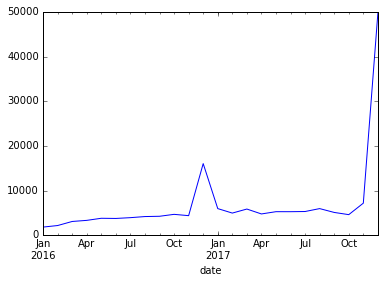

In [12]:
train_target.groupby('date')['target'].sum().plot()

In [3]:
df_train = pd.read_csv('train_data.csv')
df_train.drop('Unnamed: 0', axis=1, inplace=True)
df_train.head()

/Applications/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,time,date,v_l,q,n_tr,sum_b,code_azs,id,first_prch,location,region,code,code1,percent,type
0,NaN,2016-12-28,30.46,0,2016,1090.60,5915.0,21-8B2-7695,27.12.16 23:06:11,10.0,454.5,1010121,126.0,0.0,5
1,NaN,2016-12-27,0.00,1,2016,180.91,5915.0,21-8B2-7695,27.12.16 23:06:11,10.0,454.5,2230000,164.0,0.0,6
2,NaN,2016-12-27,35.60,0,2016,1363.48,5915.0,21-8B2-7695,27.12.16 23:06:11,10.0,454.5,1010131,128.0,0.0,13
3,08:24:24,2017-10-23,31.01,0,2017,1181.45,5915.0,21-8B2-7695,27.12.16 23:06:11,10.0,454.5,1010121,126.0,0.0,7
4,NaN,2017-03-19,51.95,0,2017,1818.09,2418.0,21-8B2-7695,27.12.16 23:06:11,9.0,454.0,1010121,126.0,0.0,5


In [4]:
df_train['date'] = df_train['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').replace(day = 1))

In [6]:
agg_train = df_train.groupby(['id', 'date'])['q', 'v_l', 'sum_b', 'percent'].sum()
agg_train.head()

q     v_l    sum_b  percent
id           date                                   
21-186G-1161 2016-03-01  0   49.68  1818.02    54.54
             2016-04-01  0   74.25  2774.54    83.23
             2016-07-01  1   50.64  2003.53    60.11
             2016-09-01  8    0.00   741.81     0.00
             2016-10-01  0  157.59  6051.85     0.00

In [7]:
agg_train.to_csv('olya_simple_sum_features.csv')

In [40]:
X = agg_train.join(train_target.set_index(['id', 'date']))
X.head()

q     v_l    sum_b  percent  target
id           date                                           
21-186G-1161 2016-03-01  0   49.68  1818.02    54.54       0
             2016-04-01  0   74.25  2774.54    83.23       1
             2016-07-01  1   50.64  2003.53    60.11       1
             2016-09-01  8    0.00   741.81     0.00       0
             2016-10-01  0  157.59  6051.85     0.00       0
             2016-11-01  1  100.33  3894.26     0.00       0
             2016-12-01  0   35.33  1363.64     0.00       1
             2017-05-01  0    7.85   273.02     0.29       0
             2017-06-01  0   12.70   454.03     0.06       1
             2017-08-01  0    7.53   272.49     0.00       1
             2017-12-01  0   30.13  1181.81     0.11       1
21-186G-1172 2017-01-01  0    8.03   272.93     0.20       0
             2017-02-01  0   15.96   545.64     0.19       0
             2017-03-01  0   49.82  1727.17     0.37       0
             2017-04-01  0   65.61  2317.39     0.18       0
             2017-05-01  0  145.15  5136.20     0.89       0
             2017-06-01  1  100.21  3682.78     0.32       0
             2017-07-01  0   77.78  2817.18     0.09       0
             2017-08-01  0   43.48  1545.55     0.31       0
             2017-09-01  0   48.04  1727.31     0.39       0
             2017-10-01  0   41.70  1499.62   227.23       0
             2017-11-01  0  123.24  4409.81     1.14       0
             2017-12-01  0   94.20  3455.09     0.57       1
21-186G-1190 2016-01-01  0   12.42   454.55    13.64       0
             2016-02-01  1   13.45   489.90    14.70       1
             2016-06-01  0    7.96   272.35     8.17       1
             2016-10-01  0   10.66   363.63     0.00       0
             2016-11-01  0   13.15   453.74     0.00       1
             2017-02-01  0    7.68   272.70     0.00       0
             2017-03-01  0   52.39  1818.02     0.43       0
...                     ..     ...      ...      ...     ...
21-186G-12   2017-07-01  0   74.14  2728.56     0.00       0
             2017-08-01  1  243.42  9128.52     0.27       0
             2017-09-01  0  104.45  3833.23     0.40       0
             2017-10-01  0  167.01  6197.48     0.43       0
             2017-11-01  0  114.72  4288.22   859.73       0
             2017-12-01  6  118.31  4757.06   160.92       1
21-186G-1201 2016-03-01  0   34.74  1181.45    70.86       0
             2016-04-01  3   76.49  2822.45   160.36       0
             2016-05-01  2   72.59  2631.66   115.94       0
             2016-06-01  0   90.21  3133.84    81.77       0
             2016-07-01  0   74.56  2635.68    79.07       0
             2016-08-01  1   56.52  2052.00    68.18       0
             2016-09-01  0   13.33   454.46     0.00       0
             2016-10-01  0   38.57  1363.15     0.00       0
             2016-11-01  0  110.15  3862.62     0.00       0
             2016-12-01  1   81.14  2949.26    86.36       0
             2017-01-01  0   62.15  2180.98   272.73       0
             2017-02-01  0    7.68   272.70     0.00       0
             2017-03-01  4   42.43  1915.52     0.00       0
             2017-04-01  3   13.59   775.00     0.00       0
             2017-05-01  2    0.00   154.54     0.00       0
             2017-06-01  1   85.17  3251.43     0.00       0
             2017-07-01  6   40.49  2040.74     0.00       0
             2017-08-01  2   55.56  2367.69    99.09       0
             2017-09-01  2   82.37  3495.14     0.00       0
             2017-10-01  1   30.91  1203.82     0.00       0
             2017-11-01  0   24.56   908.85     0.00       0
             2017-12-01  1   61.34  2484.54     0.00       1
21-186G-1215 2017-02-01  1    9.59   472.65     0.00       0
             2017-03-01  3    9.28   622.45    53.64       0

[100 rows x 5 columns]

In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [41]:
X = X.dropna()

In [42]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X.iloc[:,:4], X.iloc[:, 4])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [43]:
cross_val_score(clf, X.iloc[:,:3], X.iloc[:, 4]).mean()

0.84429888586714574

In [26]:
df_test = pd.read_csv('test_data.csv')
df_test.drop('Unnamed: 0', axis=1, inplace=True)
df_test.head()

/Applications/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,time,date,v_l,q,n_tr,sum_b,code_azs,id,first_prch,location,region,code,code1,percent,type
0,21:23:27,2017-08-12,11.89,0,2017,454.83,11125.0,21-8AD-19813,12.01.16 16:12:54,9.0,436.0,01010211,152.0,0.00,7
1,08:58:01,2016-05-10,12.32,0,2016,454.54,2388.0,21-8AH-16987,02.01.16 09:59:24,11.0,454.0,01010131,128.0,13.63,13
2,17:33:27,2017-07-26,45.36,0,2017,1863.99,1716.0,21-8B0-11899,03.01.16 14:33:09,9.0,430.0,01010132,132.0,0.00,7
3,NaN,2016-09-05,7.84,0,2016,263.69,3246.0,21-8AF-17077,12.05.15 03:24:33,6.0,458.0,01010121,126.0,0.00,5
4,NaN,2017-06-10,0.00,1,2017,53.64,3303.0,21-8AN-4584,04.01.16 18:55:55,5.0,459.0,02300000,234.0,0.00,6


In [53]:
df_tmp = df_test.groupby('id')[['date']].max()
df_tmp['id'] = df_tmp.index
df_tmp.head()

,date,id
id,,
21-186G-1142,2017-11-04,21-186G-1142
21-186G-1225,2017-09-30,21-186G-1225
21-186G-1227,2017-11-03,21-186G-1227
21-186G-1232,2017-09-15,21-186G-1232
21-186G-1258,2017-09-24,21-186G-1258


In [46]:
#agg_test = df_test.groupby(['id', 'date'])['q', 'v_l', 'sum_b', 'percent'].sum()
agg_test.head()

q    v_l    sum_b  percent
id           date                                  
21-186G-1142 2016-03-15  0  30.50  1030.90    41.24
             2016-03-26  0  33.30  1132.20    90.58
             2016-03-30  0  33.16  1127.56    90.20
             2016-04-06  0  33.97  1155.07    69.31
             2016-04-11  0  31.48  1079.83    64.78

In [55]:
my_test = df_tmp.set_index(['id', 'date']).join(agg_test)
my_test.head()

,,q,v_l,sum_b,percent
id,date,,,,
21-186G-1142,2017-11-04,0,68.61,2727.22,0.0
21-186G-1225,2017-09-30,1,11.74,544.20,0.0
21-186G-1227,2017-11-03,0,11.74,454.20,0.0
21-186G-1232,2017-09-15,0,27.27,1006.09,0.0
21-186G-1258,2017-09-24,1,44.43,1924.03,0.0


In [56]:
len(my_test)

31122

In [57]:
my_pred = clf.predict_proba(my_test)

In [58]:
my_pred = [x[1] for x in my_pred]

In [64]:
pred = pd.DataFrame()
pred['id'] = [x[0] for x in my_test.index]
pred['proba'] = my_pred
pred.to_csv('subm.csv', index=False)
pred.head()

,id,proba
0,21-186G-1142,0.151285
1,21-186G-1225,0.299746
2,21-186G-1227,0.316318
3,21-186G-1232,0.235287
4,21-186G-1258,0.206777
